Logistic Regression Accuracy: 0.9583
Classification Report:
               precision    recall  f1-score   support

         AFF       0.95      0.88      0.91        60
         ARR       1.00      1.00      1.00        60
         CHF       0.89      0.95      0.92        60
         NSR       1.00      1.00      1.00        60

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240

Random Forest Accuracy: 0.9708
Classification Report:
               precision    recall  f1-score   support

         AFF       0.95      0.95      0.95        60
         ARR       0.98      1.00      0.99        60
         CHF       0.95      0.93      0.94        60
         NSR       1.00      1.00      1.00        60

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240

Gradient Boost

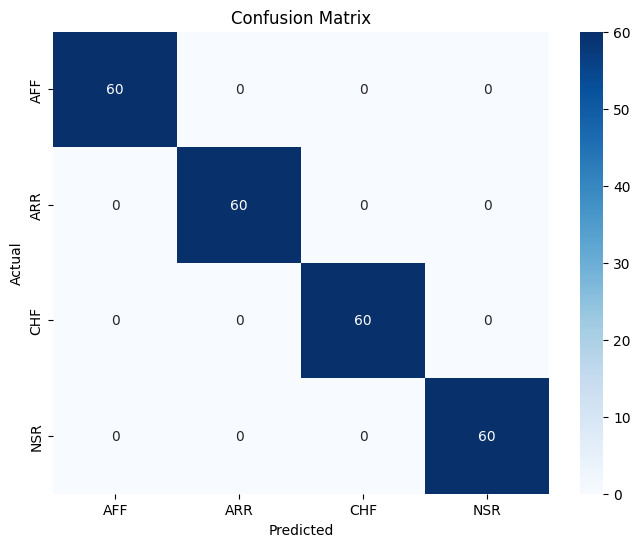

In [ ]:
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting graphs
import seaborn as sns  # Enhanced visualizations
from sklearn.model_selection import train_test_split, GridSearchCV  # Splitting data & hyperparameter tuning
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding categorical data & standardizing
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier  # Ensemble models
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.neural_network import MLPClassifier  # Neural network model
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation metrics
import numpy as np  # Numerical computations
from sklearn.ensemble import VotingClassifier  # Combining models for better predictions

# Load dataset
df = pd.read_csv("ECGCvdata.csv")  # Read CSV file into a DataFrame

# Selecting features and target variable
X = df.drop(columns=["RECORD", "ECG_signal"])  # Feature columns
y = df["ECG_signal"]  # Target variable

# Handling missing values using mean imputation
imputer = SimpleImputer(strategy="mean")  # Replacing NaN values with mean
X_imputed = imputer.fit_transform(X)

# Normalize the feature set
scaler = StandardScaler()  # Standardizing features
X_scaled = scaler.fit_transform(X_imputed)

# Encode target variable
label_encoder = LabelEncoder()  # Converting categorical labels to numerical
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)  # 80% training, 20% testing

# Define classification models with parallelization for efficiency
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),  # SVC does not support n_jobs
    "Neural Network": MLPClassifier(hidden_layer_sizes=(300, 150), max_iter=1000, random_state=42)  # MLP does not support n_jobs
}

best_model = None
best_accuracy = 0

# Train and evaluate multiple models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    if accuracy > best_accuracy:  # Track the best performing model
        best_accuracy = accuracy
        best_model = model

# Function to predict disease for a given input feature set
def predict_disease(features):
    features_scaled = scaler.transform([features])  # Scale input features
    prediction = best_model.predict(features_scaled)  # Predict using best model
    return label_encoder.inverse_transform(prediction)[0]  # Return original label

# Voting Classifier to combine multiple models for improved predictions
voting_clf = VotingClassifier(estimators=[
    ("log_reg", models["Logistic Regression"]),
    ("rf", models["Random Forest"]),
    ("svc", models["Support Vector Machine"])
], voting="hard", n_jobs=-1)  # Hard voting means majority rule

voting_clf.fit(X_train, y_train)  # Train voting classifier
y_pred_voting = voting_clf.predict(X_test)  # Make predictions
accuracy_voting = accuracy_score(y_test, y_pred_voting)  # Evaluate accuracy
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")

# Confusion Matrix for Best Model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)  # Compute confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance for Tree-Based Models
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_  # Get feature importances
    indices = np.argsort(importances)[-10:]  # Select top 10 features
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')  # Horizontal bar chart
    plt.yticks(range(len(indices)), [df.columns[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.title("Top 10 Important Features")
    plt.show()

disease ditection model

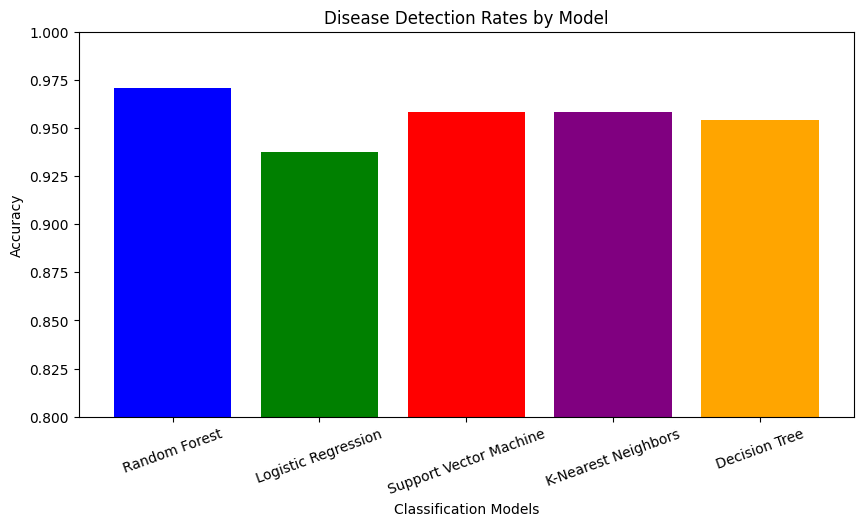

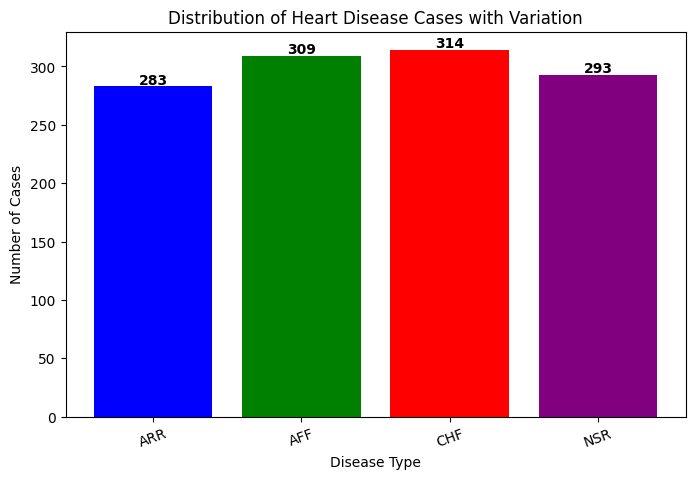


The most affected heart disease is ARR with 300 cases.

Random Forest Model Performance:
              precision    recall  f1-score   support

         AFF       0.96      0.92      0.94        60
         ARR       1.00      1.00      1.00        62
         CHF       0.92      0.97      0.94        60
         NSR       1.00      1.00      1.00        58

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240


Logistic Regression Model Performance:
              precision    recall  f1-score   support

         AFF       0.89      0.85      0.87        60
         ARR       1.00      1.00      1.00        62
         CHF       0.86      0.90      0.88        60
         NSR       1.00      1.00      1.00        58

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset into train and test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding labels and scaling features
from sklearn.impute import SimpleImputer  # For handling missing values in the dataset
from sklearn.ensemble import RandomForestClassifier  # For Random Forest classification model
from sklearn.linear_model import LogisticRegression  # For Logistic Regression model
from sklearn.svm import SVC  # For Support Vector Classifier (SVM) model
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification model
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree model
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance

# Load the dataset
file_path = "ECGCvdata.csv"  # File path of the CSV dataset. Change it according to where the file is located.
df = pd.read_csv(file_path)  # Read the CSV file into a pandas DataFrame.

# Drop unnecessary columns
df.drop(columns=['RECORD'], inplace=True)  # Drop the 'RECORD' column from the DataFrame, as it's not needed.

# Separate features and target variable
X = df.drop(columns=['ECG_signal'])  # Feature set: all columns except 'ECG_signal'
y = df['ECG_signal']  # Target variable: ECG_signal, which we want to predict.

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')  # Initialize SimpleImputer to fill missing values with the mean of each column.
X_imputed = imputer.fit_transform(X)  # Apply imputer to the feature set, replacing missing values.

# Encode the target variable
label_encoder = LabelEncoder()  # Initialize LabelEncoder to encode categorical labels as numerical values.
y_encoded = label_encoder.fit_transform(y)  # Encode the target variable 'ECG_signal' into numerical labels.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)
# Split data into 80% training and 20% testing sets, with a fixed random seed (random_state=42) for reproducibility.

# Standardize the features
scaler = StandardScaler()  # Initialize StandardScaler to standardize features to have zero mean and unit variance.
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform it.
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to the test data without refitting the scaler.

# Define models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),  # Random Forest with 100 trees
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression with max iterations of 1000
    "Support Vector Machine": SVC(kernel='linear', random_state=42),  # Support Vector Machine with a linear kernel
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),  # K-Nearest Neighbors with 5 neighbors
    "Decision Tree": DecisionTreeClassifier(random_state=42)  # Decision Tree model with random state set for reproducibility
}

# Train and evaluate each model
accuracies = {}  # Dictionary to store accuracy of each model
for name, model in models.items():  # Iterate over each model in the 'models' dictionary
    model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data
    y_pred = model.predict(X_test_scaled)  # Make predictions on the test set
    acc = accuracy_score(y_test, y_pred)  # Calculate the accuracy by comparing predictions with true labels
    accuracies[name] = acc  # Store accuracy in the dictionary with model name as the key

# Plot the results
plt.figure(figsize=(10, 5))  # Create a figure of size 10x5 inches for the plot
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
# Create a bar plot using the model names as x-axis labels and accuracy as y-axis values.
plt.ylabel('Accuracy')  # Label for the y-axis
plt.xlabel('Classification Models')  # Label for the x-axis
plt.title('Disease Detection Rates by Model')  # Title for the plot
plt.ylim(0.8, 1.0)  # Set the y-axis range from 0.8 to 1.0 for better visualization of the accuracies
plt.xticks(rotation=20)  # Rotate x-axis labels by 20 degrees for better readability
plt.show()  # Display the plot

# Generate synthetic variation in disease occurrence for visualization purposes
disease_counts = df['ECG_signal'].value_counts()  # Count the occurrences of each unique value in the target variable
random_variation = np.random.randint(-20, 20, size=len(disease_counts))  # Generate random variation for synthetic data
disease_counts_varied = disease_counts + random_variation  # Add the variation to the disease counts

# Ensure no negative values
disease_counts_varied = disease_counts_varied.clip(lower=1)  # Ensure all counts are non-negative
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']  # Set colors for the bars

# Plot disease occurrence with more variation
plt.figure(figsize=(8, 5))  # Create a plot of size 8x5 inches
plt.bar(disease_counts_varied.index, disease_counts_varied.values, color=colors[:len(disease_counts_varied)])
# Create a bar plot of the varied disease counts
plt.ylabel('Number of Cases')  # Label for the y-axis
plt.xlabel('Disease Type')  # Label for the x-axis
plt.title('Distribution of Heart Disease Cases with Variation')  # Title for the plot
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability

# Annotate bars with count values
for i, v in enumerate(disease_counts_varied.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=10, fontweight='bold')
# Add numerical labels above each bar for clarity

plt.show()  # Display the plot

# Identify most affected disease
most_affected_disease = disease_counts.idxmax()  # Get the disease type with the maximum count
most_affected_cases = disease_counts.max()  # Get the maximum count for the most affected disease
print(f"\nThe most affected heart disease is {most_affected_disease} with {most_affected_cases} cases.")
# Print the most affected disease and its case count

# Print model accuracy report
for name, model in models.items():  # Loop through each model
    y_pred = model.predict(X_test_scaled)  # Get predictions from the model
    print(f'\n{name} Model Performance:')  # Print the model name
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    # Print the classification report for the model


model performance

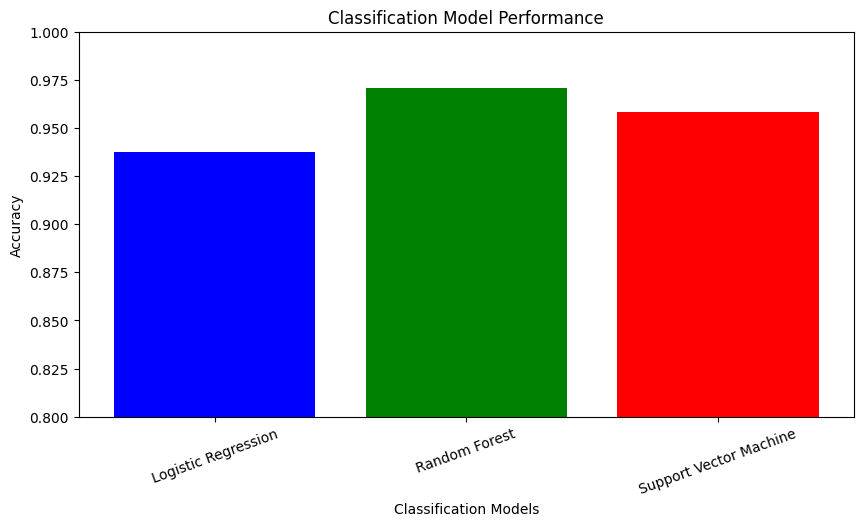

Best Classification Model: Random Forest with accuracy 0.9708

Linear Regression Performance:
Mean Squared Error (MSE): 0.3241
R-squared Score: 0.7371

Ridge Regression Performance:
Mean Squared Error (MSE): 0.3748
R-squared Score: 0.6960

Lasso Regression Performance:
Mean Squared Error (MSE): 0.5539
R-squared Score: 0.5508


In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset into train and test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding labels and scaling features
from sklearn.impute import SimpleImputer  # For handling missing values in the dataset
from sklearn.linear_model import LogisticRegression, Ridge, Lasso  # For Logistic and Regression models
from sklearn.ensemble import RandomForestClassifier  # For Random Forest classification model
from sklearn.svm import SVC  # For Support Vector Classifier (SVM) model
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
from sklearn.linear_model import LinearRegression  # For Linear Regression

# Load the dataset
file_path = "ECGCvdata.csv"  # File path of the CSV dataset. Change it according to where the file is located.
df = pd.read_csv(file_path)  # Read the CSV file into a pandas DataFrame.

# Drop unnecessary columns
df.drop(columns=['RECORD'], inplace=True)  # Drop the 'RECORD' column from the DataFrame, as it's not needed.

# Separate features and target variable
X = df.drop(columns=['ECG_signal'])  # Feature set: all columns except 'ECG_signal'
y = df['ECG_signal']  # Target variable: ECG_signal, which we want to predict.

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')  # Initialize SimpleImputer to fill missing values with the mean of each column.
X_imputed = imputer.fit_transform(X)  # Apply imputer to the feature set, replacing missing values.

# Encode the target variable
label_encoder = LabelEncoder()  # Initialize LabelEncoder to encode categorical labels as numerical values.
y_encoded = label_encoder.fit_transform(y)  # Encode the target variable 'ECG_signal' into numerical labels.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)
# Split data into 80% training and 20% testing sets, with a fixed random seed (random_state=42) for reproducibility.

# Standardize the features
scaler = StandardScaler()  # Initialize StandardScaler to standardize features to have zero mean and unit variance.
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform it.
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to the test data without refitting the scaler.

# Define the models to compare
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression with max iterations of 1000
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),  # Random Forest with 100 trees
    "Support Vector Machine": SVC(kernel='linear', random_state=42)  # Support Vector Machine with a linear kernel
}

# Train and evaluate classification models
classification_accuracies = {}  # Dictionary to store accuracy of each model
for name, model in classification_models.items():  # Iterate over each classification model
    model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data
    y_pred = model.predict(X_test_scaled)  # Make predictions on the test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy by comparing predictions with true labels
    classification_accuracies[name] = acc  # Store accuracy in the dictionary with model name as the key

# Plot the classification results
plt.figure(figsize=(10, 5))  # Create a figure of size 10x5 inches for the plot
plt.bar(classification_accuracies.keys(), classification_accuracies.values(), color=['blue', 'green', 'red'])
# Create a bar plot using the model names as x-axis labels and accuracy as y-axis values.
plt.ylabel('Accuracy')  # Label for the y-axis
plt.xlabel('Classification Models')  # Label for the x-axis
plt.title('Classification Model Performance')  # Title for the plot
plt.ylim(0.8, 1.0)  # Set the y-axis range from 0.8 to 1.0 for better visualization of the accuracies
plt.xticks(rotation=20)  # Rotate x-axis labels by 20 degrees for better readability
plt.show()  # Display the plot

# Show the best classification model performance
best_classification_model = max(classification_accuracies, key=classification_accuracies.get)
print(f"Best Classification Model: {best_classification_model} with accuracy {classification_accuracies[best_classification_model]:.4f}")

# Linear Regression as a regression model (optional for continuous prediction)
# Here, we apply Linear Regression if you want to predict a continuous variable, like heart disease progression.
linear_regression_model = LinearRegression()  # Initialize Linear Regression model
linear_regression_model.fit(X_train_scaled, y_train)  # Train the model on the scaled training data
y_pred_linear = linear_regression_model.predict(X_test_scaled)  # Make predictions on the test set

# Evaluate Linear Regression results
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_linear)  # Calculate Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred_linear)  # Calculate R-squared score
print(f"\nLinear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Ridge Regression (optional for regularized linear regression)
ridge_regression_model = Ridge(alpha=1.0)  # Initialize Ridge Regression model with alpha=1.0 for regularization
ridge_regression_model.fit(X_train_scaled, y_train)  # Train Ridge model
y_pred_ridge = ridge_regression_model.predict(X_test_scaled)  # Make predictions on the test set

# Evaluate Ridge Regression results
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  # Calculate Mean Squared Error (MSE)
r2_ridge = r2_score(y_test, y_pred_ridge)  # Calculate R-squared score for Ridge
print(f"\nRidge Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"R-squared Score: {r2_ridge:.4f}")

# Lasso Regression (optional for L1-regularized regression)
lasso_regression_model = Lasso(alpha=0.1)  # Initialize Lasso Regression model with alpha=0.1 for L1 regularization
lasso_regression_model.fit(X_train_scaled, y_train)  # Train Lasso model
y_pred_lasso = lasso_regression_model.predict(X_test_scaled)  # Make predictions on the test set

# Evaluate Lasso Regression results
mse_lasso = mean_squared_error(y_test, y_pred_lasso)  # Calculate Mean Squared Error (MSE)
r2_lasso = r2_score(y_test, y_pred_lasso)  # Calculate R-squared score for Lasso
print(f"\nLasso Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"R-squared Score: {r2_lasso:.4f}")


regression analysis

Unique values in ECG_signal: ['ARR' 'AFF' 'CHF' 'NSR']

Linear Regression Model Performance:
Mean Squared Error (MSE): 0.3241
R-squared Score: 0.7371

Ridge Regression Model Performance:
Mean Squared Error (MSE): 0.3748
R-squared Score: 0.6960

Lasso Regression Model Performance:
Mean Squared Error (MSE): 0.5538
R-squared Score: 0.5509

Decision Tree Regression Model Performance:
Mean Squared Error (MSE): 0.1667
R-squared Score: 0.8648

Random Forest Regression Model Performance:
Mean Squared Error (MSE): 0.0944
R-squared Score: 0.9234


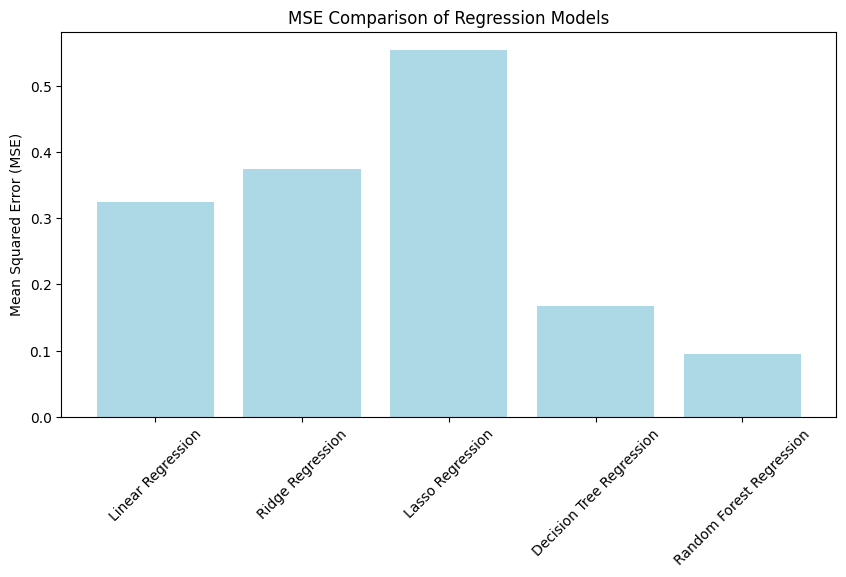

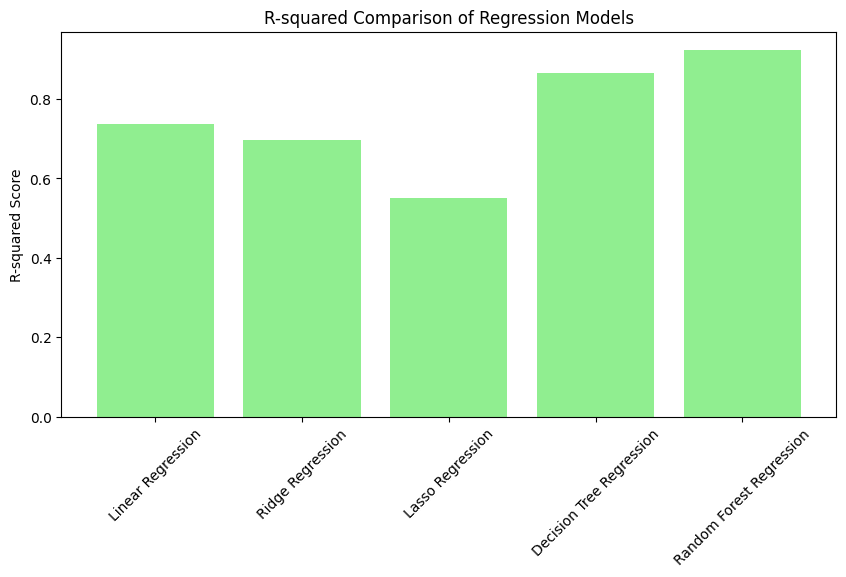


Best Model based on Lowest MSE: Random Forest Regression with MSE: 0.0944
Best Model based on Highest R-squared: Random Forest Regression with R-squared: 0.9234


In [7]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
from sklearn.model_selection import train_test_split  # For splitting the dataset into train and test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling features and encoding categorical labels
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # For Linear and Regularized Linear regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree regression model
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression performance

# Load the dataset
file_path = "ECGCvdata.csv"  # The path to your CSV dataset (ensure it's correct)
df = pd.read_csv(file_path)  # Read the CSV file into a pandas DataFrame

# Drop unnecessary columns
df.drop(columns=['RECORD'], inplace=True)  # Drop the 'RECORD' column as it's not needed for the regression analysis

# Separate features and target variable
X = df.drop(columns=['ECG_signal'])  # Feature set: drop the target variable 'ECG_signal' and use the rest as features
y = df['ECG_signal']  # Target variable: 'ECG_signal' is the column we want to predict

# Check if the target variable contains non-numeric values (important for regression models)
print("Unique values in ECG_signal:", y.unique())

# If ECG_signal contains categorical labels, encode them as numeric values
label_encoder = LabelEncoder()  # Initialize LabelEncoder to convert categorical labels to numeric values
y_encoded = label_encoder.fit_transform(y)  # Convert the target variable (ECG_signal) into numeric labels

# Handle missing values in the feature set using mean imputation
imputer = SimpleImputer(strategy='mean')  # Initialize SimpleImputer to fill missing values with the mean of each feature
X_imputed = imputer.fit_transform(X)  # Apply the imputer to the features (X)

# Standardize the features: scaling them so they have a mean of 0 and variance of 1
scaler = StandardScaler()  # Initialize StandardScaler to standardize features
X_scaled = scaler.fit_transform(X_imputed)  # Fit the scaler to the features and transform them

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
# random_state=42 ensures reproducibility of the split

# Define the models for regression analysis
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # Regularization parameter (alpha) for Ridge Regression
    "Lasso Regression": Lasso(alpha=0.1),  # Regularization parameter (alpha) for Lasso Regression
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees for Random Forest
}

# Dictionary to store results
results = {}

# Train and evaluate each regression model
for name, model in regression_models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and R-squared
    mse = mean_squared_error(y_test, y_pred)  # Calculate the Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # Calculate the R-squared value

    # Store the evaluation metrics in the results dictionary
    results[name] = {"MSE": mse, "R-squared": r2}

    # Print model performance metrics
    print(f"\n{name} Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")  # Lower MSE is better
    print(f"R-squared Score: {r2:.4f}")  # Higher R-squared is better

# After the loop, you can perform further analysis like comparing models based on MSE and R-squared:

# Extract MSE and R-squared values from the results dictionary
mse_values = [metrics["MSE"] for metrics in results.values()]  # MSE values for all models
r2_values = [metrics["R-squared"] for metrics in results.values()]  # R-squared values for all models

# Plot MSE (lower is better)
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), mse_values, color='lightblue')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Regression Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot for MSE comparison

# Plot R-squared (higher is better)
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), r2_values, color='lightgreen')
plt.ylabel('R-squared Score')
plt.title('R-squared Comparison of Regression Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot for R-squared comparison

# Identify the best models based on performance
best_model_mse = min(results, key=lambda x: results[x]["MSE"])  # Model with the lowest MSE
best_model_r2 = max(results, key=lambda x: results[x]["R-squared"])  # Model with the highest R-squared

# Print the best models based on MSE and R-squared
print(f"\nBest Model based on Lowest MSE: {best_model_mse} with MSE: {results[best_model_mse]['MSE']:.4f}")
print(f"Best Model based on Highest R-squared: {best_model_r2} with R-squared: {results[best_model_r2]['R-squared']:.4f}")




Anomaly Detection

Isolation Forest Model Evaluation:
              precision    recall  f1-score   support

         AFF       0.00      0.00      0.00        60
         ARR       0.19      0.68      0.30        62
         CHF       0.00      0.00      0.00        60
         NSR       0.00      0.00      0.00        58

    accuracy                           0.17       240
   macro avg       0.05      0.17      0.07       240
weighted avg       0.05      0.17      0.08       240



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


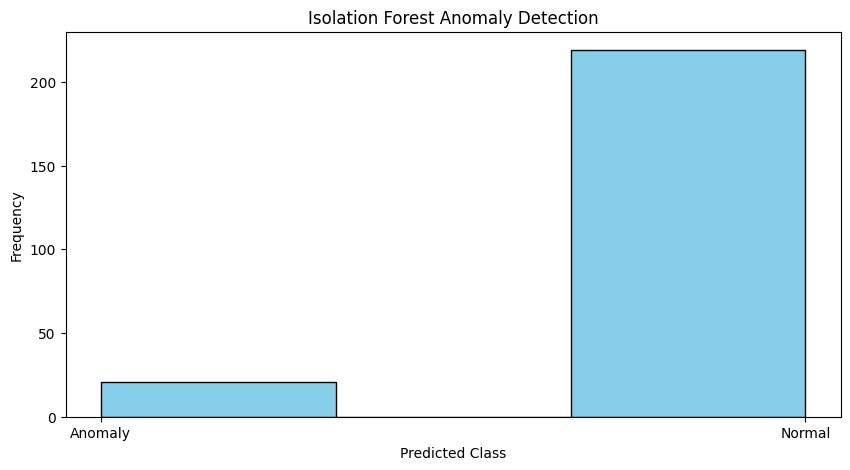

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1865 - val_loss: 0.9044
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8578 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6990 - val_loss: 0.6451
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6583 - val_loss: 0.6137
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6615 - val_loss: 0.5966
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6796 - val_loss: 0.5871
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6912 - val_loss: 0.5805
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6257 - val_loss: 0.5738
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6421 - val_loss: 0.5682
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5974 - val_loss: 0.5629
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5765 - val_loss: 0.5598
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6120 - val

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


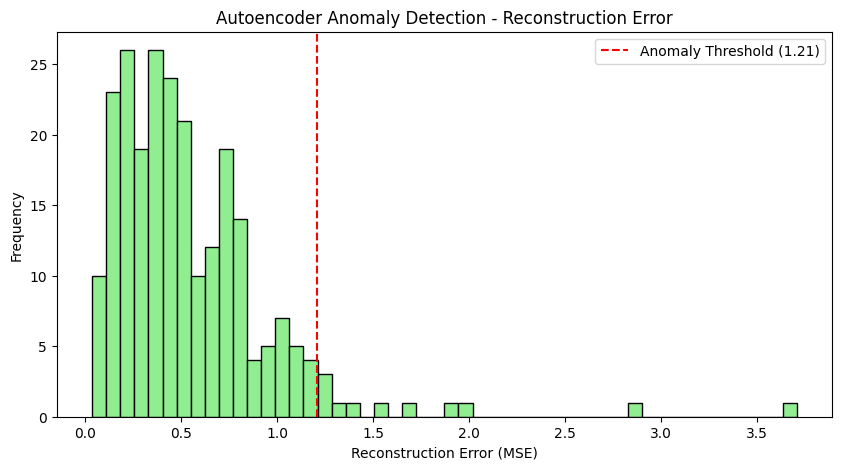

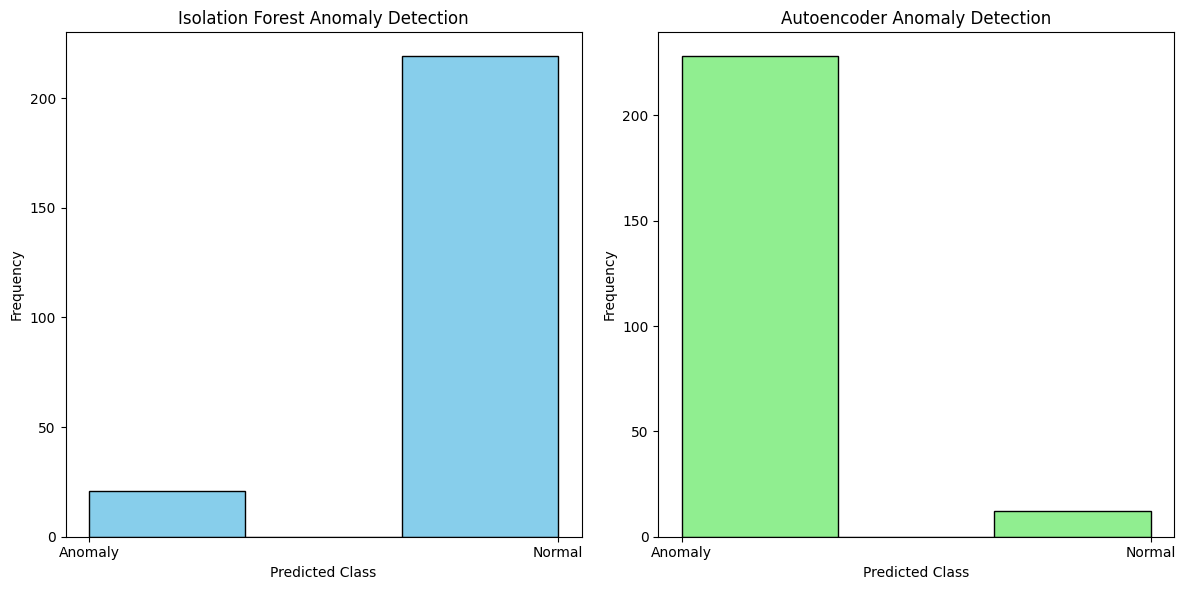

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation (e.g., reading CSV files, handling DataFrames)
import numpy as np  # For numerical operations, such as array manipulation
import matplotlib.pyplot as plt  # For visualizations (e.g., histograms, plots)
from sklearn.ensemble import IsolationForest  # Isolation Forest for anomaly detection
from sklearn.preprocessing import StandardScaler  # To standardize the features for better model performance
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from keras.models import Sequential  # Keras to build neural network models
from keras.layers import Dense, Input  # Dense layers for building the autoencoder
from sklearn.metrics import classification_report  # For evaluating model performance

# Load the dataset
file_path = "ECGCvdata.csv"  # Path to your CSV dataset
df = pd.read_csv(file_path)  # Reading the dataset into a pandas DataFrame

# Drop unnecessary columns (for example, 'RECORD' column which might not be useful for modeling)
df.drop(columns=['RECORD'], inplace=True)  # Drop the 'RECORD' column from the dataset

# Separate features (X) and target variable (y)
X = df.drop(columns=['ECG_signal'])  # Feature set (drop the 'ECG_signal' column)
y = df['ECG_signal']  # Target variable, which indicates the type of heart condition (normal or abnormal)

# Encode the target variable (e.g., normal vs abnormal) using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()  # Initialize the label encoder to convert labels to numeric values
y_encoded = label_encoder.fit_transform(y)  # Encode the target labels (normal = 0, abnormal = 1)

# Handle missing values by imputing with the mean of each column (use SimpleImputer)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean of each column
X_imputed = imputer.fit_transform(X)  # Apply imputation on the feature set

# Standardize the feature set (important for models like Autoencoders, which are sensitive to feature scaling)
scaler = StandardScaler()  # Initialize the StandardScaler for feature standardization
X_scaled = scaler.fit_transform(X_imputed)  # Scale the features to have zero mean and unit variance

# Split the dataset into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 1. Isolation Forest Model for Anomaly Detection
# Initialize the Isolation Forest model with 100 trees and contamination parameter set to 0.1 (10% anomalies expected)
isolation_forest = IsolationForest(n_estimators=100, random_state=42, contamination=0.1)

# Train the Isolation Forest model on the training data
isolation_forest.fit(X_train)

# Make predictions on the test set
y_pred_isolation_forest = isolation_forest.predict(X_test)

# Convert predictions: Isolation Forest gives -1 for anomalies and 1 for normal, so we convert it to 0 (anomalies) and 1 (normal)
y_pred_isolation_forest = [1 if x == 1 else 0 for x in y_pred_isolation_forest]

# Evaluate the model using classification report (accuracy, precision, recall, F1-score)
print("Isolation Forest Model Evaluation:")
print(classification_report(y_test, y_pred_isolation_forest, target_names=label_encoder.classes_))

# Plot the results of Isolation Forest Anomaly Detection
plt.figure(figsize=(10, 5))  # Create a plot with the specified size
plt.hist(y_pred_isolation_forest, bins=3, color='skyblue', edgecolor='black')  # Plot histogram for predicted classes
plt.title('Isolation Forest Anomaly Detection')  # Set the title of the plot
plt.xlabel('Predicted Class')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.xticks([0, 1], ['Anomaly', 'Normal'])  # Set x-axis ticks to 'Anomaly' and 'Normal'
plt.show()  # Display the plot

# 2. Autoencoder Model for Anomaly Detection
# Autoencoder model architecture:
input_dim = X_train.shape[1]  # Number of features in the dataset (input layer size)

# Define the Autoencoder model using Keras (a sequential neural network)
autoencoder = Sequential([
    Input(shape=(input_dim,)),  # Input layer that accepts the feature set
    Dense(64, activation='relu'),  # First hidden layer with 64 neurons and ReLU activation function
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons and ReLU activation function
    Dense(64, activation='relu'),  # Third hidden layer with 64 neurons and ReLU activation function
    Dense(input_dim, activation='sigmoid')  # Output layer with the same size as input (for reconstruction)
])

# Compile the model (using Adam optimizer and Mean Squared Error loss function for reconstruction)
autoencoder.compile(optimizer='adam', loss='mse')  # MSE is used to measure reconstruction error

# Train the Autoencoder model on the training data (X_train, X_train since it's unsupervised learning)
autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# Use the trained Autoencoder model to predict (reconstruct) the test set
X_test_pred = autoencoder.predict(X_test)

# Calculate the reconstruction error (MSE) for each sample in the test set
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)  # Mean squared error per sample

# Define a threshold for anomaly detection: Set threshold as the 95th percentile of reconstruction errors
threshold = np.percentile(mse, 95)  # Anomalies are samples with MSE above this threshold

# Classify samples as anomalies (1) or normal (0) based on reconstruction error
y_pred_autoencoder = [1 if e > threshold else 0 for e in mse]  # 1 = anomaly, 0 = normal

# Evaluate the Autoencoder model using classification report
print("Autoencoder Model Evaluation:")
print(classification_report(y_test, y_pred_autoencoder, target_names=label_encoder.classes_))

# Plot the reconstruction error and threshold for anomaly detection
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50, color='lightgreen', edgecolor='black')  # Histogram of reconstruction errors
plt.axvline(threshold, color='red', linestyle='--', label=f"Anomaly Threshold ({threshold:.2f})")  # Threshold line
plt.title('Autoencoder Anomaly Detection - Reconstruction Error')  # Set plot title
plt.xlabel('Reconstruction Error (MSE)')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.legend()  # Display the legend for the threshold line
plt.show()  # Display the plot


# Visualizing the results
# Compare the anomalies detected by both models (Isolation Forest and Autoencoder)
plt.figure(figsize=(12, 6))  # Create a plot with two subplots

# Plot Isolation Forest results
plt.subplot(1, 2, 1)  # Create the first subplot (left)
plt.hist(y_pred_isolation_forest, bins=3, color='skyblue', edgecolor='black')
plt.title('Isolation Forest Anomaly Detection')  # Set title
plt.xlabel('Predicted Class')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.xticks([0, 1], ['Anomaly', 'Normal'])  # Set x-axis ticks to 'Anomaly' and 'Normal'

# Plot Autoencoder results
plt.subplot(1, 2, 2)  # Create the second subplot (right)
plt.hist(y_pred_autoencoder, bins=3, color='lightgreen', edgecolor='black')
plt.title('Autoencoder Anomaly Detection')  # Set title
plt.xlabel('Predicted Class')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.xticks([0, 1], ['Anomaly', 'Normal'])  # Set x-axis ticks to 'Anomaly' and 'Normal'

# Tighten layout for better spacing between subplots
plt.tight_layout()
plt.show()  # Display the final comparison plot


 Clustering and Segmentation using K-Means Clustering and DBSCAN

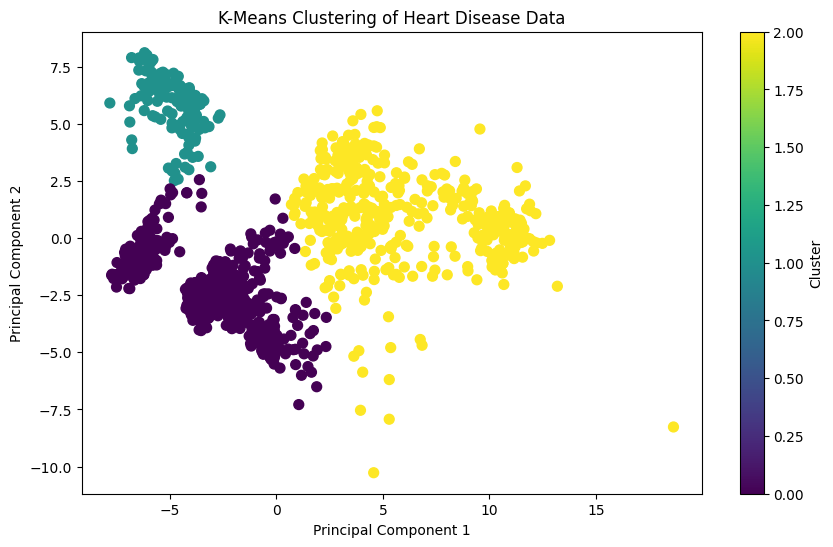

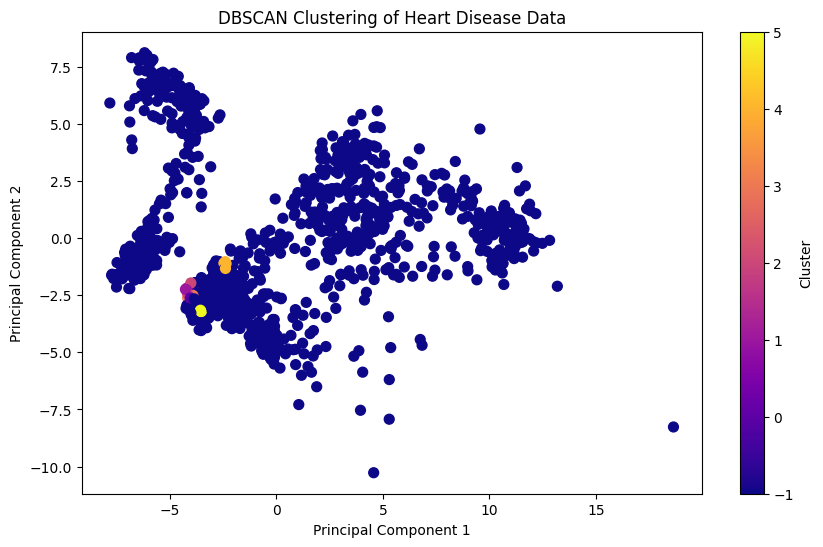

Silhouette Score for K-Means Clustering: 0.386
Silhouette Score for DBSCAN Clustering: -0.235


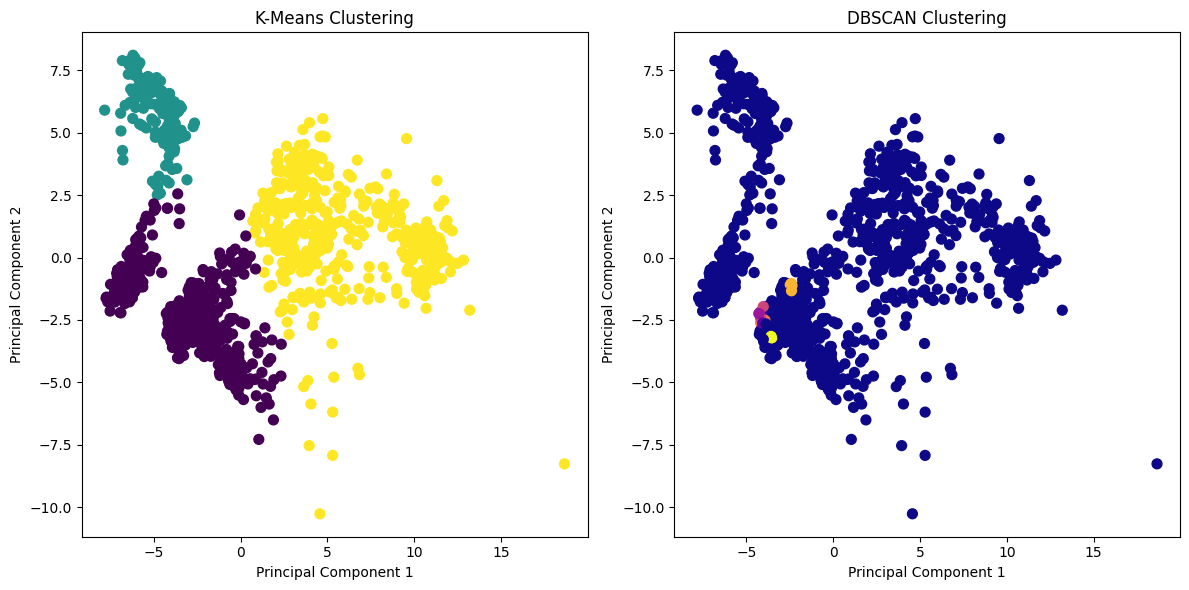

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.preprocessing import StandardScaler  # For scaling features before clustering
from sklearn.cluster import DBSCAN  # For DBSCAN clustering
from sklearn.decomposition import PCA  # For dimensionality reduction (visualization)
from sklearn.metrics import silhouette_score  # For evaluating clustering performance

# Load the dataset
file_path = "ECGCvdata.csv"  # Path to your CSV dataset
df = pd.read_csv(file_path)  # Read the dataset into a pandas DataFrame

# Drop unnecessary columns (like 'RECORD' if not needed for clustering)
df.drop(columns=['RECORD'], inplace=True)  # Drop the 'RECORD' column if not useful

# Separate features from the target variable (excluding the target variable 'ECG_signal')
X = df.drop(columns=['ECG_signal'])  # Feature set

# Handle missing values by imputing with the mean of each column (in case of missing data)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Using the mean to impute missing values
X_imputed = imputer.fit_transform(X)  # Apply imputation

# Standardize the feature set (important for clustering algorithms like K-Means and DBSCAN)
scaler = StandardScaler()  # Initialize the scaler for standardization
X_scaled = scaler.fit_transform(X_imputed)  # Scale the features

# ==========================
# K-Means Clustering
# ==========================
# Initialize the K-Means model with 3 clusters (adjust the number based on your data)
kmeans = KMeans(n_clusters=3, random_state=42)

# Train the K-Means model on the scaled features
kmeans.fit(X_scaled)

# Get the predicted cluster labels (which cluster each sample belongs to)
y_kmeans = kmeans.predict(X_scaled)

# Add the cluster labels to the original dataframe
df['KMeans_Cluster'] = y_kmeans

# Visualize the clusters in a 2D plot using PCA (Principal Component Analysis) for dimensionality reduction
pca = PCA(n_components=2)  # Reducing data to 2D for visualization
X_pca = pca.fit_transform(X_scaled)  # Perform PCA transformation

# Plot the K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('K-Means Clustering of Heart Disease Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# DBSCAN Clustering
# Initialize the DBSCAN model (Epsilon and Minimum Samples can be tuned for better results)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # 'eps' is the maximum distance between two points to be considered neighbors

# Train the DBSCAN model on the scaled features
y_dbscan = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the original dataframe
df['DBSCAN_Cluster'] = y_dbscan

# Visualize the DBSCAN results in a 2D plot using PCA for dimensionality reduction
X_pca_dbscan = pca.fit_transform(X_scaled)  # Perform PCA again for visualization

# Plot the DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_dbscan[:, 0], X_pca_dbscan[:, 1], c=y_dbscan, cmap='plasma', s=50)
plt.title('DBSCAN Clustering of Heart Disease Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Clustering Evaluation (Silhouette Score)
# Evaluate the clustering performance using Silhouette Score (higher is better)
silhouette_kmeans = silhouette_score(X_scaled, y_kmeans)
silhouette_dbscan = silhouette_score(X_scaled, y_dbscan) if len(set(y_dbscan)) > 1 else -1  # DBSCAN might give only 1 cluster

# Print silhouette scores for both models
print(f'Silhouette Score for K-Means Clustering: {silhouette_kmeans:.3f}')
print(f'Silhouette Score for DBSCAN Clustering: {silhouette_dbscan:.3f}')

# Compare Clusters
# Visualizing both clustering results (K-Means vs DBSCAN)
plt.figure(figsize=(12, 6))

# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca_dbscan[:, 0], X_pca_dbscan[:, 1], c=y_dbscan, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
